In [145]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jamie\Documents\Projects\data_m2\Breakfast_Cereals.csv")

cereals = df



## **Section 1 - Project Overview**

### *Analyse what cereal manufacturer is most common and which has the largest consistant calorie count* 

Data source: https://www.kaggle.com/datasets/crawford/80-cereals/data

# **Section 2 - Data Collection and Loading**

**Cereals Data**

Fields in the dataset:

- Name: Name of cereal
- mfr: Manufacturer of cereal
* A = American Home Food Products;
* G = General Mills
* K = Kelloggs
* N = Nabisco
* P = Post
* Q = Quaker Oats
* R = Ralston Purina
- type:
* cold
* hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

### Changed the column headings to start with a capital letter

In [146]:
cereals.columns = [col.capitalize() for col in cereals.columns]
cereals

,Name,Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


Decided to remove the data I didn't need to just show the name of the cereals, manufacturer and the calorie count of each one too

In [147]:
columns_to_show = ["Name", "Mfr", "Calories"]
cereals[columns_to_show]

,Name,Mfr,Calories
0,100%_Bran,N,70
1,100%_Natural_Bran,Q,120
2,All-Bran,K,70
3,All-Bran_with_Extra_Fiber,K,50
4,Almond_Delight,R,110
...,...,...,...
72,Triples,G,110
73,Trix,G,110
74,Wheat_Chex,R,100
75,Wheaties,G,100


# **Section 3 - Data Cleaning and Preparation**

**Missing Data**

This shows what rows have missing data and also what category they were under

In [148]:
nan_rows = cereals[cereals.isna().any(axis=1)]
nan_rows

,Name,Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


### Altered "NaN" data to show mean

Although I didn't need to analyse this data that was missing I still edited it to show that I have done it to coincide with the project requirements

Decided to show it in the mean of the all the relevant data as it made the moost sense so it wouldn't skew the data too much.

In [149]:
cereals_original = cereals.copy()
mean_potass = cereals["Potass"].mean()
cereals["Potass"] = cereals["Potass"].fillna(mean_potass)
changed_rows = cereals[cereals != cereals_original].dropna(how="all")

In [150]:
cereals_original = cereals.copy()
mean_carbo = cereals["Carbo"].mean()
cereals["Carbo"] = cereals["Carbo"].fillna(mean_carbo)
changed_rows = cereals[cereals != cereals_original].dropna(how="all")

In [151]:
cereals_original = cereals.copy()
mean_sugars = cereals["Sugars"].mean()
cereals["Sugars"] = cereals["Sugars"].fillna(mean_sugars)
changed_rows = cereals[cereals != cereals_original].dropna(how="all")

### Alterations showing that the Data has been altered

Showing what the corrected data looks like with the mean of the column being added to replace the missing data

In [152]:
selected_rows = cereals.iloc[[4, 20, 57]]
selected_rows

,Name,Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
4,Almond_Delight,R,C,110,2,2,200,1.0,14.000000,8.000000,98.666667,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.000000,0.000000,98.666667,0,2,1.0,1.00,64.533816
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,14.802632,7.026316,110.000000,0,1,1.0,0.67,50.828392


# **Section 4 - Exploratory Data Analysis**

Used .describe() to present the following data within the calories column:

- **count:** Number of non-null values.
- **mean:** Average value.
- **std:** Standard deviation.
- **min:** Minimum value.
- **25%, 50%, 75%:** Percentiles (25th, 50th (median), 75th).
- **max:** Maximum value.

In [153]:
cereals.Calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: Calories, dtype: float64

Then did the same with the manufacturer column to show how many cereals there are in this data set, how many different manufacturers there are in total, which manufacturer appears the most and the frequency of it too

In [154]:
cereals.Mfr.describe()

count     77
unique     7
top        K
freq      23
Name: Mfr, dtype: object

This shows how far above or below each cereal is compared the mean of the entire amount of calories in all of the cereals 

In [155]:
calories = cereals.Calories - cereals.Calories.mean()
calories

0    -36.883117
1     13.116883
2    -36.883117
3    -56.883117
4      3.116883
        ...    
72     3.116883
73     3.116883
74    -6.883117
75    -6.883117
76     3.116883
Name: Calories, Length: 77, dtype: float64

The data shows the distribution of calorie counts for cereals. Each row represents a specific calorie value and the number of cereals that have that calorie count.


In [156]:
cereals.groupby("Calories").Calories.count()

Calories
50      3
70      2
80      1
90      7
100    17
110    29
120    10
130     2
140     3
150     2
160     1
Name: Calories, dtype: int64

This data line shows the amount of different manufacturers there are in this data set and how many times they show up

In [157]:
manufacturer_counts = df["Mfr"].value_counts()
print("\nNumber of cereals per manufacturer:")
print(manufacturer_counts)


Number of cereals per manufacturer:
Mfr
K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: count, dtype: int64


### The represents the entire cereals that are made by Kelloggs

In [158]:
top_manufacturers = cereals["Mfr"].value_counts().nlargest(2).index

# Separate the data for each top manufacturer
manufacturer_1_cereals = cereals[cereals["Mfr"] == top_manufacturers[0]]
manufacturer_2_cereals = cereals[cereals["Mfr"] == top_manufacturers[1]]

print("Data for Manufacturer 1:")
manufacturer_1_cereals

Data for Manufacturer 1:


,Name,Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
16,Corn_Flakes,K,C,100,2,0,290,1.0,21.0,2.0,35.0,25,1,1.00,1.00,45.863324
17,Corn_Pops,K,C,110,1,0,90,1.0,13.0,12.0,20.0,25,2,1.00,1.00,35.782791
19,Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7.0,160.0,25,3,1.00,0.50,40.448772
21,Crispix,K,C,110,2,0,220,1.0,21.0,3.0,30.0,25,3,1.00,1.00,46.895644
24,Froot_Loops,K,C,110,2,1,125,1.0,11.0,13.0,30.0,25,2,1.00,1.00,32.207582
25,Frosted_Flakes,K,C,110,1,0,200,1.0,14.0,11.0,25.0,25,1,1.00,0.75,31.435973
26,Frosted_Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7.0,100.0,25,2,1.00,0.80,58.345141


### This shows the overal mean for *Kelloggs*

In [167]:
mean_calories_manufacturer_1 = manufacturer_1_cereals['Calories'].mean()

print(mean_calories_manufacturer_1)

108.69565217391305


### The represents the entire cereals that are made by General Mills

In [124]:
print("\nData for Manufacturer 2:")
manufacturer_2_cereals


Data for Manufacturer 2:


,Name,Mfr,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1.0,105.0,25,1,1.00,1.25,50.764999
12,Cinnamon_Toast_Crunch,G,C,120,1,3,210,0.0,13.0,9.0,45.0,25,2,1.00,0.75,19.823573
13,Clusters,G,C,110,3,2,140,2.0,13.0,7.0,105.0,25,3,1.00,0.50,40.400208
14,Cocoa_Puffs,G,C,110,1,1,180,0.0,12.0,13.0,55.0,25,2,1.00,1.00,22.736446
18,Count_Chocula,G,C,110,1,1,180,0.0,12.0,13.0,65.0,25,2,1.00,1.00,22.396513
22,Crispy_Wheat_&_Raisins,G,C,100,2,1,140,2.0,11.0,10.0,120.0,25,3,1.00,0.75,36.176196
31,Golden_Grahams,G,C,110,1,1,280,0.0,15.0,9.0,45.0,25,2,1.00,0.75,23.804043
36,Honey_Nut_Cheerios,G,C,110,3,1,250,1.5,11.5,10.0,90.0,25,1,1.00,0.75,31.072217


### This shows the overal mean for *General Mills*

In [168]:
mean_calories_manufacturer_2 = manufacturer_2_cereals['Calories'].mean()

print(mean_calories_manufacturer_2)

111.36363636363636


## A bar chart to show Kelloggs cereal

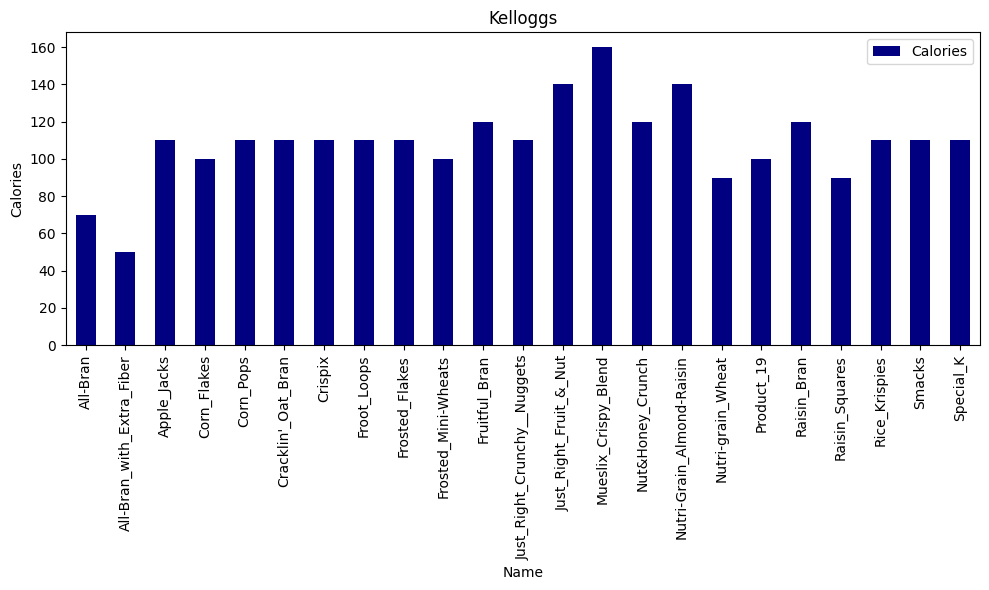

In [127]:
manufacturer_1_cereals.plot(
    kind='bar', 
    x='Name', 
    y='Calories', 
    rot=90, 
    color='navy', 
    figsize=(10, 6)
).set(
    xlabel='Name', 
    ylabel='Calories'
)
plt.title("Kelloggs")
plt.tight_layout()  
plt.show()

## Bar chart to show General Mills cereal

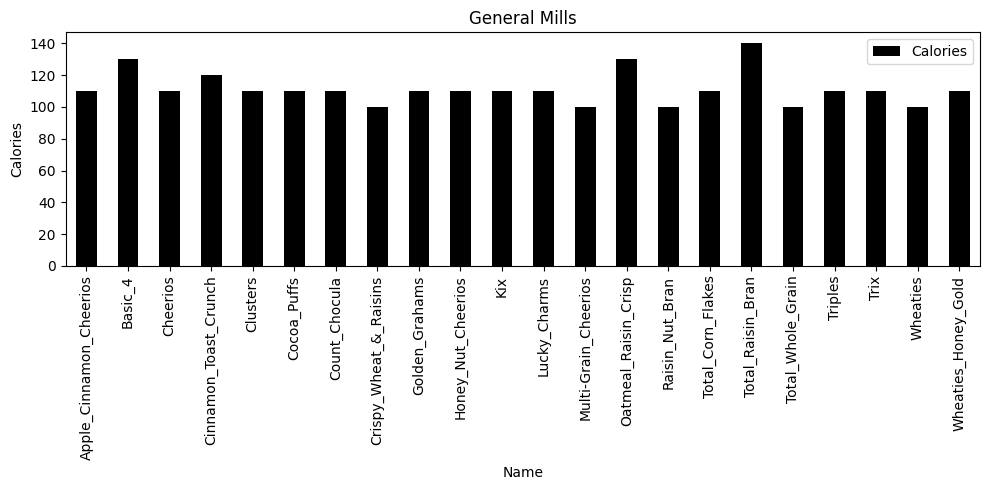

In [ ]:
manufacturer_2_cereals.plot(
    kind='bar', 
    x='Name', 
    y='Calories', 
    rot=90, 
    color='black', 
    figsize=(10, 5)
).set(
    xlabel='Name', 
    ylabel='Calories'
)
plt.title("General Mills")
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()

# Section 5 - Analysis of data
If we compare the bar charts for Kelloggs and General Mills, the findings show that General Mills produces a larger variety of cereals with calorie counts exceeding 100 calories compared to Kellogg's, which in fact it shows that every single General Mills cereals is 100 or above. However, Kellogg's stands out for having the cereal with the highest individual calorie count overall.

This suggests that General Mills focuses on offering more moderately high-calorie cereals, while Kellogg's includes fewer high-calorie options but with a notable outlier. These trends highlight differences in how the two brands approach their product offerings. It also shows that Kelloggs prodice a little more of a wider range of cereals in comparison to General Mills.

The mean for each Kelloggs and General Mills also shows that General Mills has the higher amount of calories between the two manufacturers. Kelloggs has: **108.6** calories compared to General Mills which has: **111.3**.

# Section 6 - Conclusion
In this project, I analyzed the calorie content of cereals produced by General Mills and Kellogg's. The results indicate that General Mills produces a larger number of cereals with calorie counts exceeding 100 calories compared to Kellogg's. However, despite producing fewer high-calorie cereals overall, Kellogg's stands out for having the cereal with the highest individual calorie count among all cereals analyzed.

This finding highlights the difference in product offerings between the two brands—while General Mills focuses on a broader range of moderately high-calorie cereals, Kellogg's includes a few products that are exceptionally high in calories. Further exploration into factors such as serving size, ingredients, and nutritional composition could provide a more comprehensive understanding of these differences. It also shows that General Mills could be considered the most unhealthier option between the 2 brands in a general outlook.

I think maybe in future I will think twice when selecting what brand of breakfast cereal I will be selecting for my cereal of choice!